In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# FBI Hate Crime

### Hate Crime Preprocess

In [9]:
crime_df = pd.read_csv("hate_crime.csv")
crime_df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
1,893434,2020,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Government/Public Building,Anti-Transgender,Individual,S,S
2,1052479,2020,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
3,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S
4,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


In [11]:
crime_df['incident_date'] = pd.to_datetime(crime_df['incident_date'])

In [13]:
# Columns to keep: data_year, incident_date, offense_name, bias_desc
col_keep = ['data_year', 'incident_date', 'offense_name', 'bias_desc']
filtered_crime_df = crime_df[col_keep]
filtered_crime_df

,data_year,incident_date,offense_name,bias_desc
0,2020,2020-01-24,Arson;Burglary/Breaking & Entering,Anti-Other Christian
1,2020,2020-01-03,Aggravated Assault,Anti-Transgender
2,2020,2020-05-04,Aggravated Assault,Anti-American Indian or Alaska Native
3,2020,2020-06-01,Sexual Assault With An Object,Anti-Female
4,2020,2020-06-21,Aggravated Assault,Anti-Black or African American
...,...,...,...,...
20833,2021,2021-01-12,Intimidation,Anti-American Indian or Alaska Native
20834,2021,2021-01-04,Aggravated Assault,Anti-Female
20835,2021,2021-10-06,Aggravated Assault,Anti-Mental Disability
20836,2021,2021-05-20,All Other Larceny,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."


Note: The Hate Crime Statistics Data Collection compiles data about both single-bias and
multiple-bias hate crimes. A single-bias incident is defined as an incident in which one
or more offense types are motivated by the same bias. Beginning in 2013, law
enforcement agencies could report up to five bias motivations per offense type.
Therefore, the definition of a multiple-bias incident has been revised to “an incident in
which one or more offense types are motivated by two or more biases.”

- Anti-Asian
- Anti-Asian;Anti-Black or African American
- Anti-Asian;Anti-Other Race/Ethnicity/Ancestry
- Anti-Arab;Anti-Asian
- Anti-Asian;Anti-White
- Anti-Asian;Anti-Black or African American;Anti-Gay (Male)
- Anti-Asian;Anti-Hindu
- Anti-Asian;Anti-Black or African American;Anti-Islamic (Muslim)
- Anti-Asian;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)
- Anti-Asian;Anti-Black or African American;Anti-Multiple Races, Group
- Anti-Asian;Anti-Black or African American;Anti-Gay (Male);Anti-Multiple Races, Group
- Anti-Asian;Anti-Female
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Jewish;Anti-Multiple Races, Group
- Anti-Asian;Anti-Jewish
- Anti-Asian;Anti-Black or African American;Anti-Jewish
- Anti-Asian;Anti-Multiple Races, Group
- Anti-Asian;Anti-Gay (Male)
- Anti-Asian;Anti-Black or African American;Anti-Hispanic or Latino
- Anti-Asian;Anti-Black or African American;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)
- Anti-American Indian or Alaska Native;Anti-Asian;Anti-Black or African American;Anti-Islamic (Muslim);Anti-White
- Anti-Asian;Anti-Female;Anti-Multiple Races, Group
- Anti-American Indian or Alaska Native;Anti-Asian
- Anti-Asian;Anti-Transgender
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Multiple Races, Group
- Anti-Asian;Anti-Black or African American;Anti-Female;Anti-Hispanic or Latino
- Anti-Arab;Anti-Asian;Anti-Black or African American



In [15]:
# Filter those anti-asian incidents
asian_crime_df = filtered_crime_df[filtered_crime_df['bias_desc'].str.contains("Anti-Asian", case=True)]
asian_crime_df

,data_year,incident_date,offense_name,bias_desc
50,2020,2020-04-05,Destruction/Damage/Vandalism of Property,Anti-Asian
96,2020,2020-04-08,Aggravated Assault,Anti-Asian
180,2020,2020-03-19,Intimidation,Anti-Asian
211,2020,2020-12-01,Intimidation,Anti-Asian
340,2020,2020-09-08,Intimidation,Anti-Asian
...,...,...,...,...
20713,2021,2021-10-27,Simple Assault,Anti-Arab;Anti-Asian;Anti-Black or African Ame...
20738,2021,2021-11-05,Destruction/Damage/Vandalism of Property,Anti-Asian
20754,2021,2021-10-16,Destruction/Damage/Vandalism of Property,Anti-Asian
20801,2021,2021-10-06,Intimidation,Anti-Asian


In [18]:
crime_2020 = filtered_crime_df[filtered_crime_df['data_year']==2020]
crime_2021 = filtered_crime_df[filtered_crime_df['data_year']==2021]

asian_crime_2020 = asian_crime_df[asian_crime_df['data_year']==2020]
asian_crime_2021 = asian_crime_df[asian_crime_df['data_year']==2021]

In [19]:
# Ratio of anti-asian incidents
asian_ratio_2020 = len(asian_crime_2020) / len(crime_2020)
asian_ratio_2021 = len(asian_crime_2021) / len(crime_2021)
print('Number of Anti-Asian Hate Crimes: ', len(asian_crime_2020),len(asian_crime_2021))
print('Number of all hate crimes: ', len(crime_2020), len(crime_2021))
print('Ratio of Anti-Asian hate crimes: ', asian_ratio_2020, asian_ratio_2021)

Number of Anti-Asian Hate Crimes:  357 778
Number of all hate crimes:  9949 10889
Ratio of Anti-Asian hate crimes:  0.035883003316916275 0.07144825052805584


### 2020 Anti-Asian Hate Crime Visualization

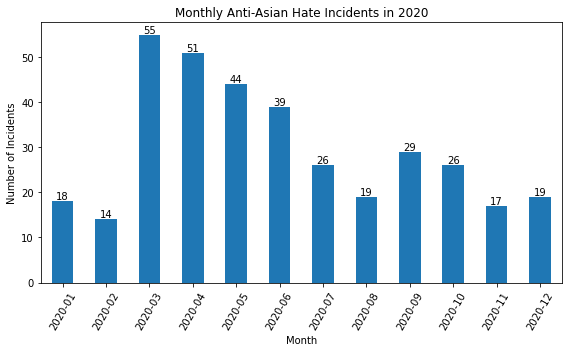

In [52]:
asian_monthly_counts = asian_crime_2020.groupby(asian_crime_2020['incident_date'].dt.to_period('M')).size()

asian_monthly_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Monthly Anti-Asian Hate Incidents in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

for index, value in enumerate(asian_monthly_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

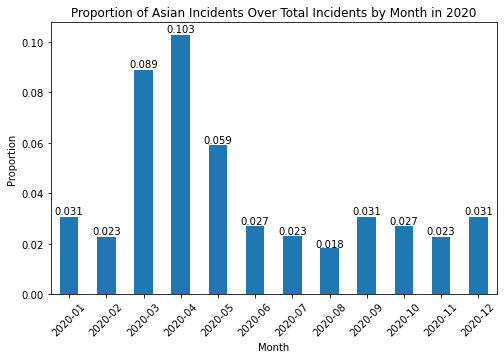

In [53]:
df_2020_monthly = crime_2020.groupby(crime_2020['incident_date'].dt.to_period('M')).size()
monthly_proportions = asian_monthly_counts / df_2020_monthly

monthly_proportions.plot(kind='bar', figsize=(8, 5))
plt.title('Proportion of Asian Incidents Over Total Incidents by Month in 2020')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

for index, value in enumerate(monthly_proportions):
    plt.text(index, round(value, 3), str(round(value, 3)), ha='center', va='bottom')

plt.show()

### 2021 Anti-Asian Hate Crime Visualization

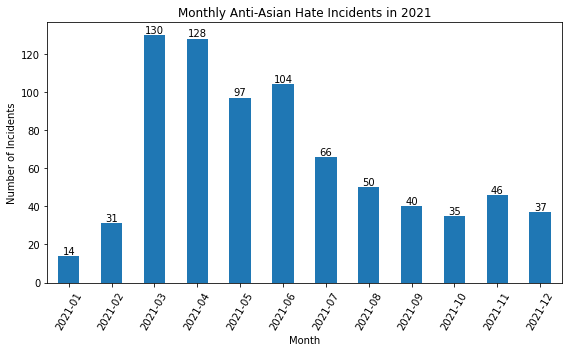

In [23]:
asian_monthly_counts = asian_crime_2021.groupby(asian_crime_2021['incident_date'].dt.to_period('M')).size()

asian_monthly_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Monthly Anti-Asian Hate Incidents in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability

for index, value in enumerate(asian_monthly_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

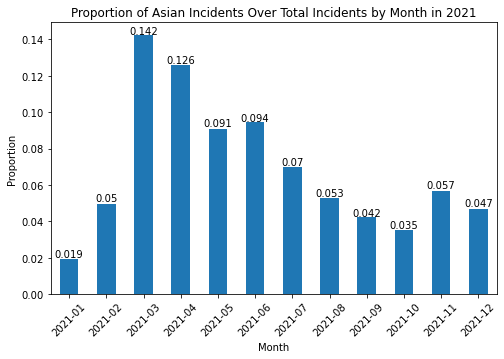

In [24]:
df_2021_monthly = crime_2021.groupby(crime_2021['incident_date'].dt.to_period('M')).size()
monthly_proportions = asian_monthly_counts / df_2021_monthly

monthly_proportions.plot(kind='bar', figsize=(8, 5))
plt.title('Proportion of Asian Incidents Over Total Incidents by Month in 2021')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

for index, value in enumerate(monthly_proportions):
    plt.text(index, round(value, 3), str(round(value, 3)), ha='center', va='bottom')

plt.show()

FBI Hate Crime EDA:
- 2020: Peak in March and April, two tails are insignificant in comparison
- 2021: Peak in March and April, the peak effect spillover to later month decreasingly with another increase in November

# Google Search Trend

### Google trend preprocess

In [83]:
google_df = pd.read_csv("/Users/itsyuzhou/Winter2024/MA_thesis/GoogleTrends.csv")
google_df

,Week,Chink + Chinaman + Chinkland + Gook: (United States),Chinese virus + China virus + Wuhan virus + Kung flu: (United States)
0,2020-01-05,1,1
1,2020-01-12,1,2
2,2020-01-19,1,89
3,2020-01-26,1,100
4,2020-02-02,1,40
...,...,...,...
99,2021-11-28,1,1
100,2021-12-05,1,1
101,2021-12-12,1,1
102,2021-12-19,1,1


In [26]:
google_df['Week'] = pd.to_datetime(google_df['Week'])
google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'] = google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].replace('<1', '0.5').astype(float)
google_df['Chink + Chinaman + Chinkland + Gook: (United States)'] = google_df['Chink + Chinaman + Chinkland + Gook: (United States)'].replace('<1', '0.5').astype(float)

google_df.dtypes

Week                                                                     datetime64[ns]
Chink + Chinaman + Chinkland + Gook: (United States)                            float64
Chinese virus + China virus + Wuhan virus + Kung flu: (United States)           float64
dtype: object

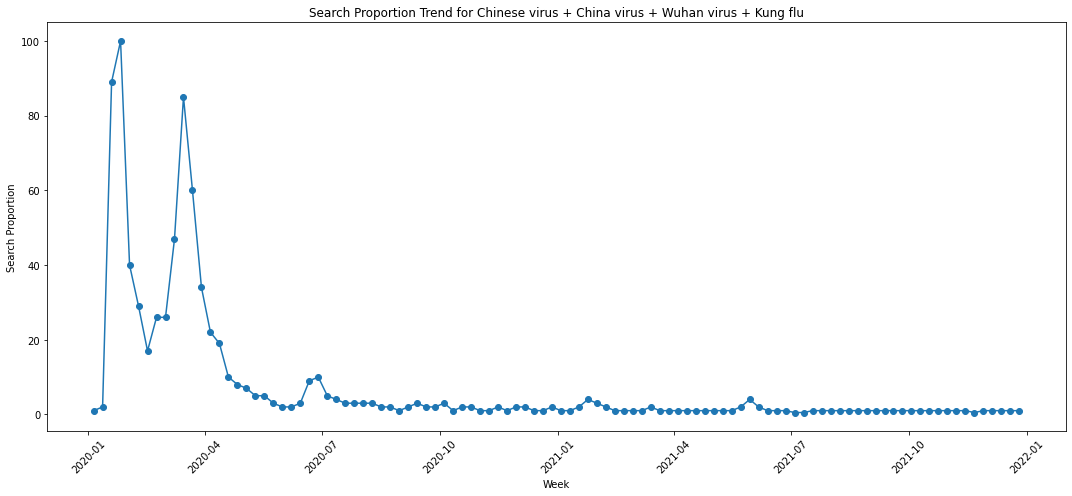

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(
    google_df['Week'].values, 
    google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].values, 
    marker='o', linestyle='-'
)

plt.title('Search Proportion Trend for Chinese virus + China virus + Wuhan virus + Kung flu')
plt.xlabel('Week')
plt.ylabel('Search Proportion')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

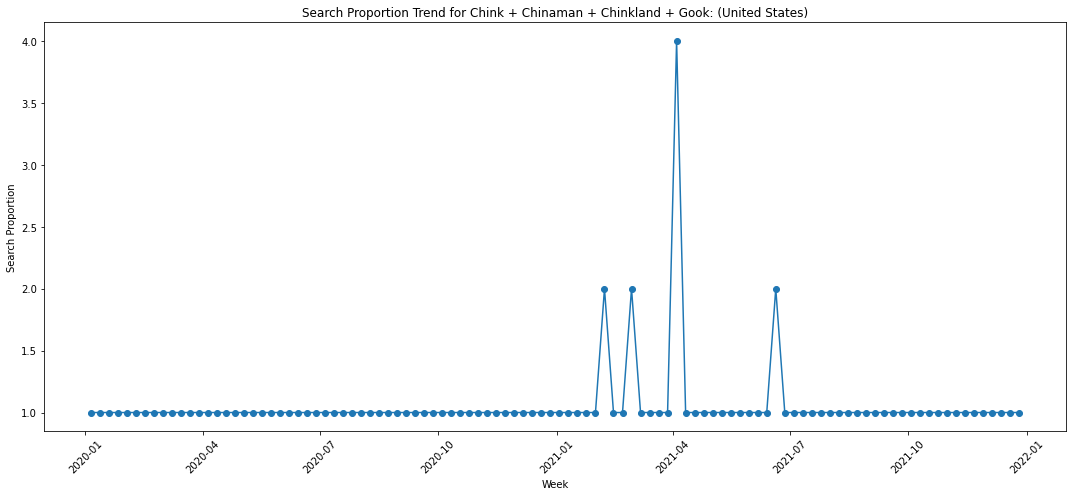

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(
    google_df['Week'].values, 
    google_df['Chink + Chinaman + Chinkland + Gook: (United States)'].values, 
    marker='o', linestyle='-'
)

plt.title('Search Proportion Trend for Chink + Chinaman + Chinkland + Gook: (United States)')
plt.xlabel('Week')
plt.ylabel('Search Proportion')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

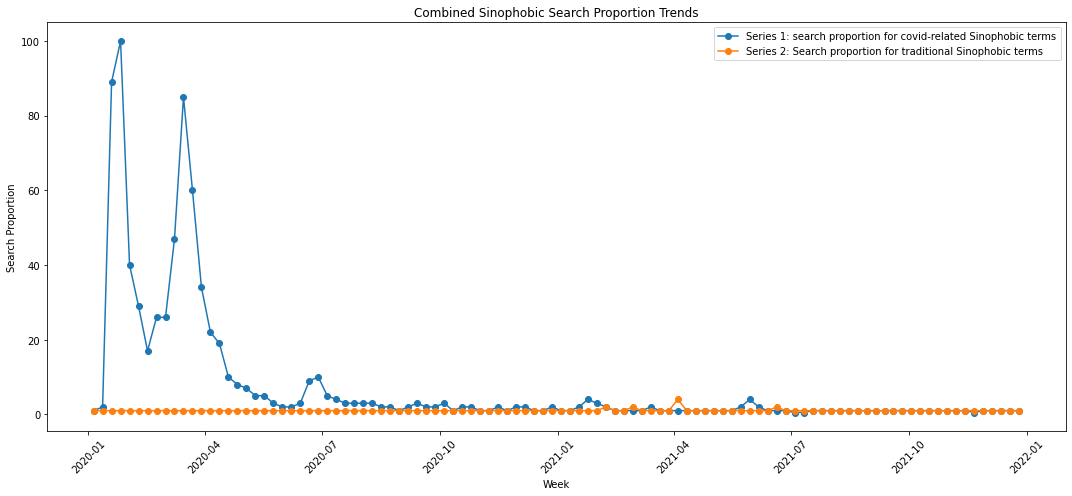

In [29]:
plt.figure(figsize=(15, 7))

plt.plot(
    google_df['Week'].values, 
    google_df['Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].values, 
    marker='o', linestyle='-', 
    label='Series 1: search proportion for covid-related Sinophobic terms'
)

plt.plot(
    google_df['Week'].values, 
    google_df['Chink + Chinaman + Chinkland + Gook: (United States)'].values, 
    marker='o', linestyle='-', 
    label='Series 2: Search proportion for traditional Sinophobic terms'
)

plt.title('Combined Sinophobic Search Proportion Trends')
plt.xlabel('Week')
plt.ylabel('Search Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Google Search Trend EDA:
- Covid-related Sinophobic searches peak in 2020/2 and 2020/3, with another noticeable increase in 2020/6 and 2020/7
- Traditional Sinophobic searches peak in 2021/2, 2021/3, 2021/4 (most significant), and 2021/7

In [33]:
comment_df = pd.read_csv("/Users/itsyuzhou/Winter2024/Content-Analysis-Homework/final_project/china_sentiment.csv", lineterminator='\n')
comment_df.head()

,Comment PublishedAt,Comment,Video PublishedAt,Video Title,tokenized_text,normalized_tokens,Hate Speech Score
0,2023-03-16,Hey! First comment of 2023! Is it anniversary ...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Hey', 'First', 'comment', 'of', '2023', 'Is'...","['hey', 'comment', 'anniversary', 'day', 'chin...",0.685360
1,2021-03-26,Lora of good warnings here... that unfortunate...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Lora', 'of', 'good', 'warnings', 'here', 'th...","['lora', 'good', 'warnings', 'unfortunately', ...",0.320128
2,2020-06-22,The Chinese Coronavirus.,2020-03-09,Tucker: We must remain calm but not complacent...,"['The', 'Chinese', 'Coronavirus']","['chinese', 'coronavirus']",0.000340
3,2020-06-09,I bet his favorite food is Chinese food. Gtfoh,2020-03-09,Tucker: We must remain calm but not complacent...,"['I', 'bet', 'his', 'favorite', 'food', 'is', ...","['bet', 'favorite', 'food', 'chinese', 'food',...",0.999489
4,2020-05-19,Did he just said that China is the most racist...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Did', 'he', 'just', 'said', 'that', 'China',...","['said', 'china', 'racist', 'country', 'world']",0.000678


In [42]:
print(comment_df.iloc[123]['Comment'])
print(comment_df.iloc[123]['Hate Speech Score'])

I seem to remember my President calling out this problem of outsourcing key American industries to China over 10 years ago.
0.0001686504983808


# Correlation Analysis

In [44]:
comment_df['Hate Speech'] = (comment_df['Hate Speech Score'] >= 0.2).astype(int)
comment_df.head()

,Comment PublishedAt,Comment,Video PublishedAt,Video Title,tokenized_text,normalized_tokens,Hate Speech Score,Hate Speech
0,2023-03-16,Hey! First comment of 2023! Is it anniversary ...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Hey', 'First', 'comment', 'of', '2023', 'Is'...","['hey', 'comment', 'anniversary', 'day', 'chin...",0.685360,1
1,2021-03-26,Lora of good warnings here... that unfortunate...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Lora', 'of', 'good', 'warnings', 'here', 'th...","['lora', 'good', 'warnings', 'unfortunately', ...",0.320128,1
2,2020-06-22,The Chinese Coronavirus.,2020-03-09,Tucker: We must remain calm but not complacent...,"['The', 'Chinese', 'Coronavirus']","['chinese', 'coronavirus']",0.000340,0
3,2020-06-09,I bet his favorite food is Chinese food. Gtfoh,2020-03-09,Tucker: We must remain calm but not complacent...,"['I', 'bet', 'his', 'favorite', 'food', 'is', ...","['bet', 'favorite', 'food', 'chinese', 'food',...",0.999489,1
4,2020-05-19,Did he just said that China is the most racist...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Did', 'he', 'just', 'said', 'that', 'China',...","['said', 'china', 'racist', 'country', 'world']",0.000678,0


In [48]:
comment_df['Video PublishedAt'] = pd.to_datetime(comment_df['Video PublishedAt'])
comment_df['Month'] = comment_df['Video PublishedAt'].dt.to_period('M')
comment_df.head()

,Comment PublishedAt,Comment,Video PublishedAt,Video Title,tokenized_text,normalized_tokens,Hate Speech Score,Hate Speech,Month
0,2023-03-16,Hey! First comment of 2023! Is it anniversary ...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Hey', 'First', 'comment', 'of', '2023', 'Is'...","['hey', 'comment', 'anniversary', 'day', 'chin...",0.685360,1,2020-03
1,2021-03-26,Lora of good warnings here... that unfortunate...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Lora', 'of', 'good', 'warnings', 'here', 'th...","['lora', 'good', 'warnings', 'unfortunately', ...",0.320128,1,2020-03
2,2020-06-22,The Chinese Coronavirus.,2020-03-09,Tucker: We must remain calm but not complacent...,"['The', 'Chinese', 'Coronavirus']","['chinese', 'coronavirus']",0.000340,0,2020-03
3,2020-06-09,I bet his favorite food is Chinese food. Gtfoh,2020-03-09,Tucker: We must remain calm but not complacent...,"['I', 'bet', 'his', 'favorite', 'food', 'is', ...","['bet', 'favorite', 'food', 'chinese', 'food',...",0.999489,1,2020-03
4,2020-05-19,Did he just said that China is the most racist...,2020-03-09,Tucker: We must remain calm but not complacent...,"['Did', 'he', 'just', 'said', 'that', 'China',...","['said', 'china', 'racist', 'country', 'world']",0.000678,0,2020-03


In [51]:
hateComments_monthly_counts = comment_df.groupby(comment_df['Video PublishedAt'].dt.to_period('M'))['Hate Speech'].sum()
hateComments_monthly_counts

Video PublishedAt
2020-01      78
2020-02     103
2020-03     922
2020-04      12
2020-05     165
2020-06      69
2020-07      50
2020-08       7
2020-09    3037
2020-10     167
2020-11      86
2020-12      51
Freq: M, Name: Hate Speech, dtype: int64

In [54]:
asian_monthly_counts

incident_date
2020-01    18
2020-02    14
2020-03    55
2020-04    51
2020-05    44
2020-06    39
2020-07    26
2020-08    19
2020-09    29
2020-10    26
2020-11    17
2020-12    19
Freq: M, dtype: int64

In [56]:
comments_score_aggregated = comment_df.groupby('Month')['Hate Speech Score'].mean()
comments_score_aggregated

Month
2020-01    0.441886
2020-02    0.443404
2020-03    0.386435
2020-04    0.322001
2020-05    0.383086
2020-06    0.475127
2020-07    0.372409
2020-08    0.365997
2020-09    0.417827
2020-10    0.290872
2020-11    0.367612
2020-12    0.327474
Freq: M, Name: Hate Speech Score, dtype: float64

In [57]:
fbi_comment = pd.DataFrame({
    'Crime Count': asian_monthly_counts,
    'Average Hate Score': comments_score_aggregated
}).dropna() 
fbi_comment

,Crime Count,Average Hate Score
2020-01,18,0.441886
2020-02,14,0.443404
2020-03,55,0.386435
2020-04,51,0.322001
2020-05,44,0.383086
2020-06,39,0.475127
2020-07,26,0.372409
2020-08,19,0.365997
2020-09,29,0.417827
2020-10,26,0.290872


In [58]:
correlation = fbi_comment.corr()
print(correlation)

                    Crime Count  Average Hate Score
Crime Count            1.000000           -0.078508
Average Hate Score    -0.078508            1.000000


Analysis on FBI anti-asian hate crimes and comment hate score:
- Weak Correlation: The correlation coefficient between "Crime Count" and "Average Hate Score" is 0.079, suggesting that there is almost no linear relationship between these two variables.
- Negative Correlation: Average hate score descreases as crime count increases

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_data_standardized = pd.DataFrame(scaler.fit_transform(fbi_comment), columns=fbi_comment.columns, index=fbi_comment.index)

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


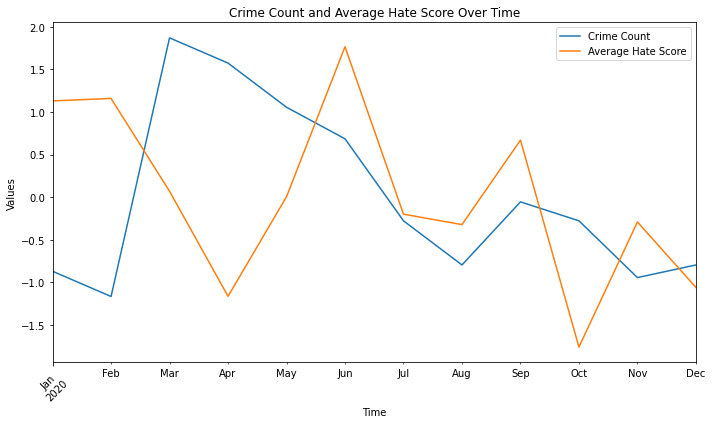

In [64]:
combined_data_standardized.plot(kind='line', figsize=(10, 6))

plt.title('Crime Count and Average Hate Score Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Crime Count', 'Average Hate Score'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
fbi_comment1 = pd.DataFrame({
    'Crime Count': asian_monthly_counts,
    'Hate Comment Count': hateComments_monthly_counts
}).dropna() 
fbi_comment1

,Crime Count,Hate Comment Count
2020-01,18,78
2020-02,14,103
2020-03,55,922
2020-04,51,12
2020-05,44,165
2020-06,39,69
2020-07,26,50
2020-08,19,7
2020-09,29,3037
2020-10,26,167


In [60]:
correlation1 = fbi_comment1.corr()
print(correlation1)

                    Crime Count  Hate Comment Count
Crime Count            1.000000            0.142474
Hate Comment Count     0.142474            1.000000


Analysis on FBI anti-asian hate crimes and Sinophobic comment count:
- Weak positive correlation
- More logical then using average hate speech score, at least this one is positive as intuitive

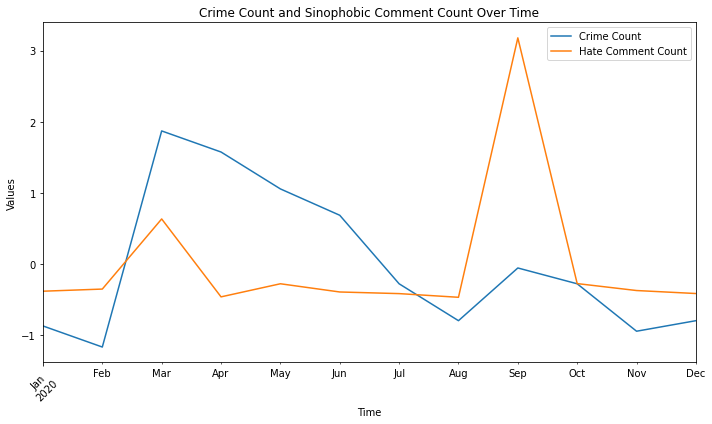

In [65]:
combined_data_standardized1 = pd.DataFrame(scaler.fit_transform(fbi_comment1), columns=fbi_comment1.columns, index=fbi_comment1.index)

combined_data_standardized1.plot(kind='line', figsize=(10, 6))

plt.title('Crime Count and Sinophobic Comment Count Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Crime Count', 'Hate Comment Count'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Regression Analysis

### 1. OLS (Ordinary Least Squares)

In [66]:
import statsmodels.api as sm

In [70]:
combined_data_standardized

,Crime Count,Average Hate Score
2020-01,-0.870520,1.130038
2020-02,-1.166867,1.159093
2020-03,1.870691,0.068731
2020-04,1.574344,-1.164516
2020-05,1.055737,0.004632
2020-06,0.685303,1.766264
2020-07,-0.277825,-0.199728
2020-08,-0.796433,-0.322445
2020-09,-0.055565,0.669563
2020-10,-0.277825,-1.760312


### 1.1 Crime count and average hate score

In [71]:
# Define predictor and response variables
y = combined_data_standardized['Crime Count']
x = combined_data_standardized['Average Hate Score']

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Crime Count   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   0.06202
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.808
Time:                        16:44:40   Log-Likelihood:                -16.990
No. Observations:                  12   AIC:                             37.98
Df Residuals:                      10   BIC:                             38.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                       0      0

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- Indenpendent variable: Average Hate Score
- Dependent variable: Crime Count
- changes in crime count = -0.0785 * average hate score

In [72]:
x = combined_data_standardized['Crime Count']
y = combined_data_standardized['Average Hate Score']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Hate Score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                   0.06202
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.808
Time:                        16:48:30   Log-Likelihood:                -16.990
No. Observations:                  12   AIC:                             37.98
Df Residuals:                      10   BIC:                             38.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.661e-16      0.315  -2.11e-15      

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 1.2 Crime count and Sinophobic comment count

In [74]:
combined_data_standardized1

,Crime Count,Hate Comment Count
2020-01,-0.870520,-0.382213
2020-02,-1.166867,-0.352125
2020-03,1.870691,0.633545
2020-04,1.574344,-0.461644
2020-05,1.055737,-0.277508
2020-06,0.685303,-0.393044
2020-07,-0.277825,-0.415911
2020-08,-0.796433,-0.467662
2020-09,-0.055565,3.178956
2020-10,-0.277825,-0.275101


In [75]:
y = combined_data_standardized1['Crime Count']
x = combined_data_standardized1['Hate Comment Count']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Crime Count   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.2072
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.659
Time:                        16:51:00   Log-Likelihood:                -16.904
No. Observations:                  12   AIC:                             37.81
Df Residuals:                      10   BIC:                             38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                       0      0

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 1.3 Crime count and Google search trend

In [87]:
google_2020_df = pd.read_csv('/Users/itsyuzhou/Winter2024/MA_thesis/GoogleSearch2020.csv')
google_2020_df

,Week,Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)
0,2019-12-29,1
1,2020-01-05,2
2,2020-01-12,4
3,2020-01-19,96
4,2020-01-26,100
5,2020-02-02,44
6,2020-02-09,30
7,2020-02-16,19
8,2020-02-23,28
9,2020-03-01,27


In [90]:
google_2020_df['Week'] = pd.to_datetime(google_2020_df['Week'])
google_2020_df.dtypes

Week                                                                                                           datetime64[ns]
Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)             int64
dtype: object

In [91]:
google_monthly = google_2020_df.groupby(google_2020_df['Week'].dt.to_period('M'))['Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States)'].mean()
google_monthly

Week
2019-12     1.00
2020-01    50.50
2020-02    30.25
2020-03    52.00
2020-04    15.75
2020-05     5.60
2020-06     7.25
2020-07     4.75
2020-08     3.40
2020-09     3.25
2020-10     2.75
2020-11     2.20
2020-12     2.50
Freq: M, Name: Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States), dtype: float64

In [93]:
google_monthly = google_monthly.iloc[1:]
google_monthly

Week
2020-01    50.50
2020-02    30.25
2020-03    52.00
2020-04    15.75
2020-05     5.60
2020-06     7.25
2020-07     4.75
2020-08     3.40
2020-09     3.25
2020-10     2.75
2020-11     2.20
2020-12     2.50
Freq: M, Name: Chink + Chinaman + Chinkland + Gook + Chinese virus + China virus + Wuhan virus + Kung flu: (United States), dtype: float64

In [94]:
fbi_google = pd.DataFrame({
    'Crime Count': asian_monthly_counts,
    'Google Search Trend': google_monthly
}).dropna() 
fbi_google

,Crime Count,Google Search Trend
2020-01,18,50.50
2020-02,14,30.25
2020-03,55,52.00
2020-04,51,15.75
2020-05,44,5.60
2020-06,39,7.25
2020-07,26,4.75
2020-08,19,3.40
2020-09,29,3.25
2020-10,26,2.75


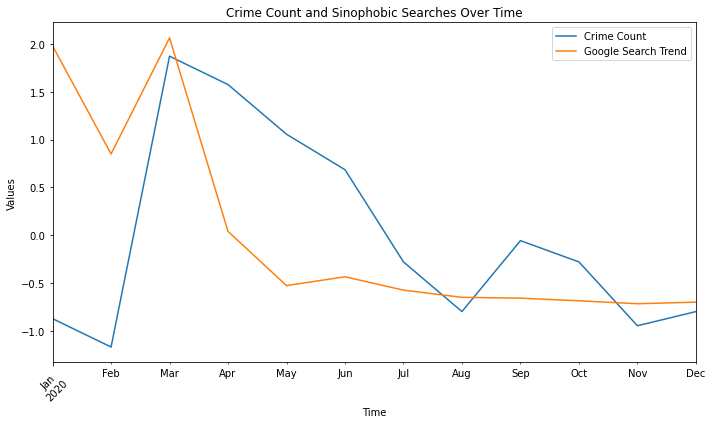

In [95]:
fbi_google_standardized = pd.DataFrame(scaler.fit_transform(fbi_google), columns=fbi_google.columns, index=fbi_google.index)

fbi_google_standardized.plot(kind='line', figsize=(10, 6))

plt.title('Crime Count and Sinophobic Searches Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Crime Count', 'Google Search Trend'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
y = fbi_google_standardized['Crime Count']
x = fbi_google_standardized['Google Search Trend']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Crime Count   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.4500
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.518
Time:                        17:17:16   Log-Likelihood:                -16.763
No. Observations:                  12   AIC:                             37.53
Df Residuals:                      10   BIC:                             38.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                        0    

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


anti-asian crime count = 0.2075 * sinophobic search frequency

In [97]:
x = fbi_google_standardized['Crime Count']
y = fbi_google_standardized['Google Search Trend']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Google Search Trend   R-squared:                       0.043
Model:                             OLS   Adj. R-squared:                 -0.053
Method:                  Least Squares   F-statistic:                    0.4500
Date:                 Tue, 19 Mar 2024   Prob (F-statistic):              0.518
Time:                         17:21:06   Log-Likelihood:                -16.763
No. Observations:                   12   AIC:                             37.53
Df Residuals:                       10   BIC:                             38.50
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.776e-17      0.309   8.97

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 1.4 Google Search Trend and Hate Comment Score

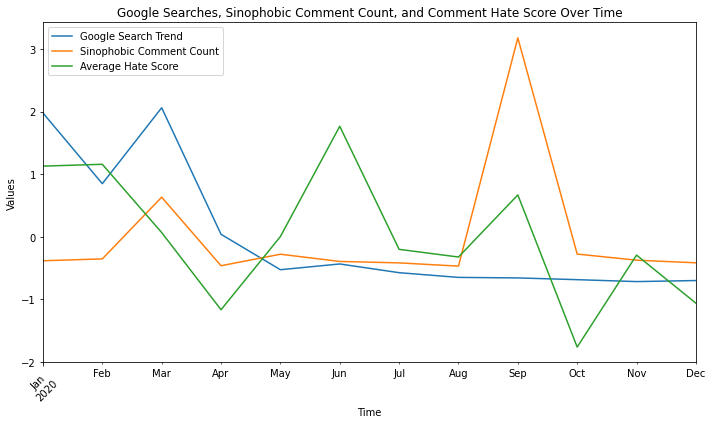

In [98]:
google_comment = pd.DataFrame({
    'Google Search Trend': google_monthly,
    'Sinophobic Comment Count': hateComments_monthly_counts,
    'Average Hate Score': comments_score_aggregated
}).dropna() 

google_comment_standardized = pd.DataFrame(scaler.fit_transform(google_comment), columns=google_comment.columns, index=google_comment.index)

google_comment_standardized.plot(kind='line', figsize=(10, 6))

plt.title('Google Searches, Sinophobic Comment Count, and Comment Hate Score Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Google Search Trend', 'Sinophobic Comment Count', 'Average Hate Score'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
y = google_comment_standardized['Average Hate Score']
x = google_comment_standardized['Google Search Trend']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Hate Score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.708
Date:                Wed, 20 Mar 2024   Prob (F-statistic):              0.220
Time:                        08:49:15   Log-Likelihood:                -16.081
No. Observations:                  12   AIC:                             36.16
Df Residuals:                      10   BIC:                             37.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.661e-16    

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 1.5 Google Search Trend and Sinophobic Comment Count

In [102]:
y = google_comment_standardized['Sinophobic Comment Count']
x = google_comment_standardized['Google Search Trend']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Sinophobic Comment Count   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.100
Method:                       Least Squares   F-statistic:                  0.004435
Date:                      Wed, 20 Mar 2024   Prob (F-statistic):              0.948
Time:                              08:53:16   Log-Likelihood:                -17.025
No. Observations:                        12   AIC:                             38.05
Df Residuals:                            10   BIC:                             39.02
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


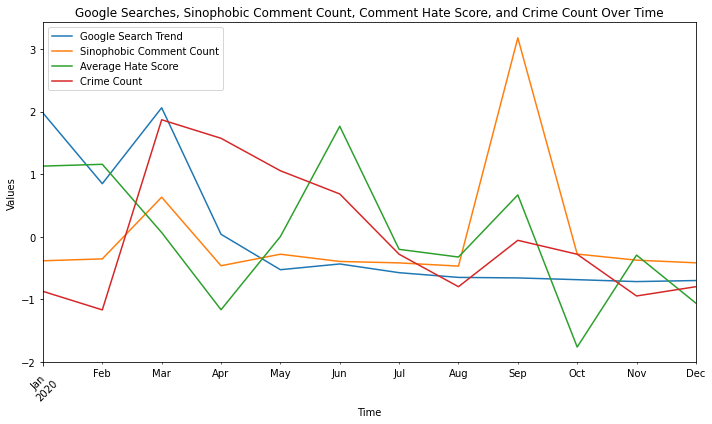

In [99]:
google_comment_crime = pd.DataFrame({
    'Google Search Trend': google_monthly,
    'Sinophobic Comment Count': hateComments_monthly_counts,
    'Average Hate Score': comments_score_aggregated,
    'Crime Count': asian_monthly_counts,
}).dropna() 

google_comment_crime_standardized = pd.DataFrame(scaler.fit_transform(google_comment_crime), columns=google_comment_crime.columns, index=google_comment_crime.index)

google_comment_crime_standardized.plot(kind='line', figsize=(10, 6))

plt.title('Google Searches, Sinophobic Comment Count, Comment Hate Score, and Crime Count Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Google Search Trend', 'Sinophobic Comment Count', 'Average Hate Score', 'Crime Count'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
comments = pd.DataFrame({
    'Sinophobic Comment Count': hateComments_monthly_counts,
    'Average Hate Score': comments_score_aggregated
}).dropna() 

google_comment_standardized = pd.DataFrame(scaler.fit_transform(google_comment), columns=google_comment.columns, index=google_comment.index)

google_comment_standardized.plot(kind='line', figsize=(10, 6))

plt.title('Google Searches, Sinophobic Comment Count, and Comment Hate Score Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Google Search Trend', 'Sinophobic Comment Count', 'Average Hate Score'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. VAR (Vector Autoregression)

A VAR(p) model for a multivariate time series is a regression model for outcomes at a specified time t and time lagged predictors, with p indicating the lag (e.g., p = 1 refers to the observation previous to t; p = 2 refers to two observations prior to t, and so on ).
- Testing Stationarity
- Selecting Lag Length
- Building the VAR Model
- Testing for Residual Autocorrelation
- Assessing Stability of the VAR Model
- Evaluating Granger Causality

### 2.1 Test Stationarity - Augmented Dickey-Fuller Test

Stationarity is critical to development of a VAR model because in its absence, a model’s statistics such as means and correlations will not accurately describe the time series signal.

The augmented Dickey-Fuller test is used to test stationarity. The null hypothesis is that the time series is nonstationary and the alternative is that the series is stationary. Rejection of the null hypothesis indicates that the series does not need transformation to achieve stationarity and modeling can proceed to the lag length selection step.
- Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
- Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

Citation: https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
def adf_test(timeseries):
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [106]:
google_comment_crime_standardized

,Google Search Trend,Sinophobic Comment Count,Average Hate Score,Crime Count
2020-01,1.978784,-0.382213,1.130038,-0.870520
2020-02,0.849511,-0.352125,1.159093,-1.166867
2020-03,2.062434,0.633545,0.068731,1.870691
2020-04,0.040895,-0.461644,-1.164516,1.574344
2020-05,-0.525135,-0.277508,0.004632,1.055737
2020-06,-0.433120,-0.393044,1.766264,0.685303
2020-07,-0.572537,-0.415911,-0.199728,-0.277825
2020-08,-0.647822,-0.467662,-0.322445,-0.796433
2020-09,-0.656187,3.178956,0.669563,-0.055565
2020-10,-0.684070,-0.275101,-1.760312,-0.277825


#### 2.1.1 Google Search Trend Stationary

In [107]:
# Standardized
adf_test(google_comment_crime_standardized['Google Search Trend'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -2.334751
p-value                        0.161005
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


Google Search Trend: The p-value 0.161005 is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values. Fail to reject the null hypothesis and hence the time series is non-stationary.

#### 2.1.2 YouTube Comment Stationary

In [109]:
adf_test(google_comment_crime_standardized['Sinophobic Comment Count'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -3.525518
p-value                         0.007355
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [111]:
adf_test(google_comment_crime_standardized['Average Hate Score'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 2.631450
p-value                        0.999080
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


Sinophobic comment count is stationary, comment hate score is non-stationary

#### 2.1.3 FBI Hate Crime Stationary

In [112]:
adf_test(google_comment_crime_standardized['Crime Count'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.294867
p-value                        0.631517
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Anti-Asian hate crime count is also non-stationary

### 2.1.4 Difference Non-Stationary

In [114]:
comment_count_diff = hateComments_monthly_counts.diff().dropna()
comment_score_diff = comments_score_aggregated.diff().dropna()
google_diff = google_monthly.diff().dropna()
crime_diff = asian_monthly_counts.diff().dropna()

In [115]:
adf_test(comment_count_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -4.894721
p-value                         0.000036
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [116]:
adf_test(comment_score_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                -3.837260
p-value                        0.002548
#Lags Used                     1.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [117]:
adf_test(google_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                -34.529501
p-value                         0.000000
#Lags Used                      2.000000
Number of Observations Used     8.000000
Critical Value (1%)            -4.665186
Critical Value (5%)            -3.367187
Critical Value (10%)           -2.802961
dtype: float64


In [118]:
adf_test(crime_diff)

Results of Augmented Dickey-Fuller Test:
Test Statistic                -3.333357
p-value                        0.013452
#Lags Used                     3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [119]:
diff_combined = pd.concat([comment_count_diff, comment_score_diff, google_diff, crime_diff], axis=1)
diff_combined = diff_combined.set_axis(['comment count', 'comment score', 'google', 'crime'], axis=1)

### 2.2 Select Lag Length and Build the VAR model

In [122]:
from statsmodels.tsa.api import VAR

model = VAR(diff_combined)
optimal_order = model.select_order()
print(optimal_order.selected_orders)

{'aic': 1, 'bic': 0, 'hqic': 1, 'fpe': 1}


In [123]:
optimal_order.summary()

,AIC,BIC,FPE,HQIC
0,19.55,19.67*,3.112e+08,19.42
1,19.14*,19.74,3.044e+08*,18.48*


In [125]:
# Lag length=1, fit the VAR model
var_results = model.fit(1)

### 2.4 Test for Residual Autocorrelation

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Mar, 2024
Time:                     09:47:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    19.7447
Nobs:                     10.0000    HQIC:                   18.4756
Log likelihood:          -132.455    FPE:                3.04432e+08
AIC:                      19.1395    Det(Omega_mle):     6.01346e+07
--------------------------------------------------------------------
Results for equation comment count
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   24.222413       546.087734            0.044           0.965
L1.comment count        -0.438946         0.505647           -0.868           0.385
L1.comment score      1321.342499      8

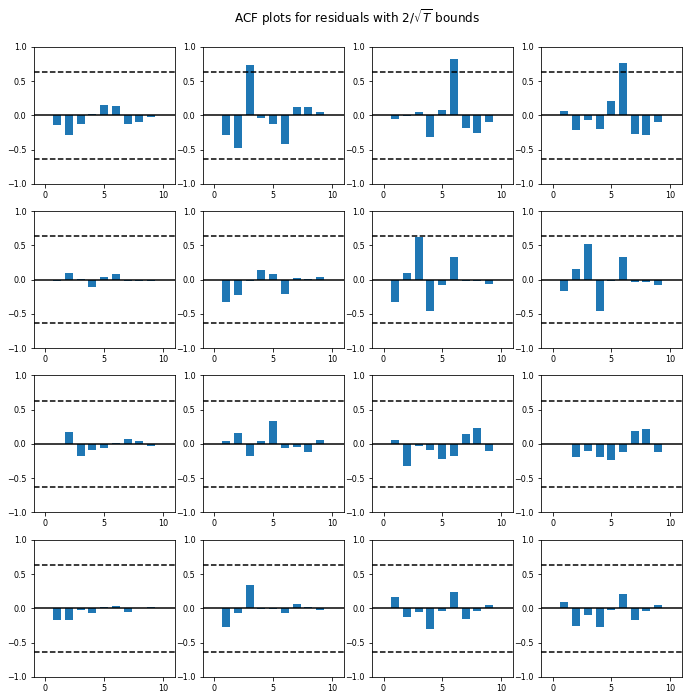

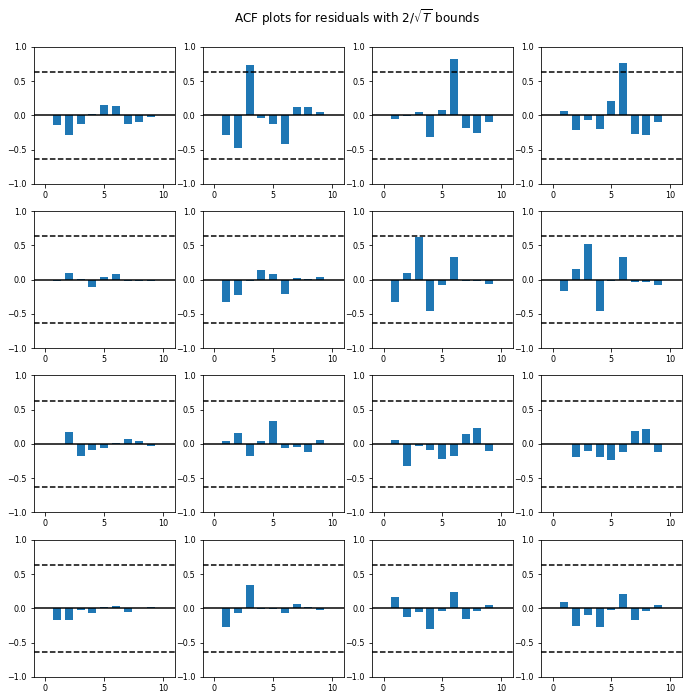

In [126]:
print(var_results.summary())
var_results.plot_acorr()

In [ ]:
results = grangercausalitytests(resid[['twitter', 'google_old']], maxlag=15, verbose=False)
p_values_tgo = []

for lag, test_results in results.items():
    print(f"Lag {lag}")
    print(f"\tF-Statistic: {test_results[0]['params_ftest'][0]:.4f}, p-value: {test_results[0]['params_ftest'][1]:.4f}")
    p_values_tgo.append([lag, test_results[0]['params_ftest'][1]])

print('twitter --> old google: ',p_values_tgo)

### 2.5 Assess Statbility of VAR

### 2.6 Evaluating Granger Causality